In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.torch_adapter import TorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [8]:
cfg = get_whar_cfg(WHARDatasetID.HAR_SENSE)

cfg.parallelize = False
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

dataset = TorchAdapter(cfg, force_recompute)

2025-10-12 20:44:52,479 - whar-datasets - INFO - Running DownloadingStep
2025-10-12 20:44:52,480 - whar-datasets - INFO - Checking hash for DownloadingStep
2025-10-12 20:44:52,481 - whar-datasets - INFO - Hash is up to date
2025-10-12 20:44:52,482 - whar-datasets - INFO - Running ParsingStep
2025-10-12 20:44:52,482 - whar-datasets - INFO - Checking hash for ParsingStep
2025-10-12 20:44:52,483 - whar-datasets - INFO - Hash is up to date
2025-10-12 20:44:52,483 - whar-datasets - INFO - Running WindowingStep
2025-10-12 20:44:52,484 - whar-datasets - INFO - Checking hash for WindowingStep
2025-10-12 20:44:52,485 - whar-datasets - INFO - Hash is up to date
2025-10-12 20:44:52,485 - whar-datasets - INFO - Loading windowing
2025-10-12 20:44:52,495 - whar-datasets - INFO - activity_ids from 0 to 6
2025-10-12 20:44:52,495 - whar-datasets - INFO - subject_ids from 0 to 11


In [9]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(
    batch_size=32, scv_group_index=0, force_recompute=False
)

2025-10-12 20:44:54,734 - whar-datasets - INFO - train: 532 | val: 60 | test: 106
2025-10-12 20:44:54,735 - whar-datasets - INFO - Running SamplingStep
2025-10-12 20:44:54,735 - whar-datasets - INFO - Checking hash for SamplingStep
2025-10-12 20:44:54,737 - whar-datasets - INFO - Hash is up to date
2025-10-12 20:44:54,738 - whar-datasets - INFO - Loading samples
Loading samples: 100%|██████████| 698/698 [00:00<00:00, 4345.60it/s]


In [10]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{5: 0.4358933418489541, 2: 0.5532492415775186, 4: 1.0274628772153918, 3: 1.1064984831550373, 0: 1.4384480281015486, 1: 1.4384480281015486, 6: -1}


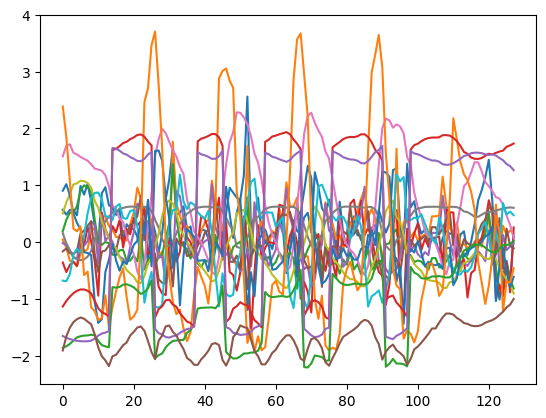

In [16]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()